In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler  #for normalization
from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the training dataset in a dataframe using Pandas
df = pd.read_csv('loan_train.csv')

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv('loan_test.csv')

# Data Processing

In [4]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test_col = len(test.columns)
print(test_col)
df_col = len(df.columns)
print(df_col)
#print(test.columns)

12
13


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df[df.duplicated(subset=None,keep='first') == True]
#dataset has no dupliacte row so we don't drop any row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [9]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

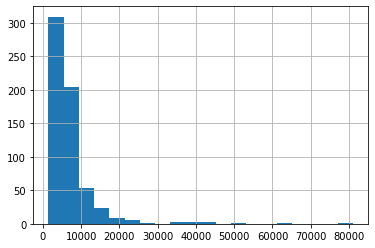

In [12]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['TotalIncome'].hist(bins=20)

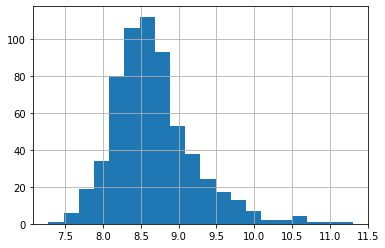

In [13]:
# Perform log transformation of TotalIncome to make it closer to normal distribution 
df['TotalIncome_log'] = np.log(df['TotalIncome'])
# Looking at the distribtion of TotalIncome_log
df['TotalIncome_log'].hist(bins=20)

# log transformation makes our data less skewness .

In [14]:
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
TotalIncome          False
TotalIncome_log      False
dtype: bool

In [15]:
#fill missing value in Gender
df['Gender'].replace(to_replace=np.nan,value=df['Gender'].mode()[0],inplace=True)

#fill missing value in Married
df['Married'].replace(to_replace=np.nan,value=df['Married'].mode()[0],inplace=True)

#fill missing value in Dependents
df['Dependents'].replace(to_replace=np.nan,value=df['Dependents'].mode()[0],inplace=True)

#fill missing value in Credit_History
df['Credit_History'].replace(to_replace=np.nan,value=df['Credit_History'].mode()[0],inplace=True)

#fill missing value in Self Employed
df['Self_Employed'].replace(to_replace=np.nan,value=df['Self_Employed'].mode()[0],inplace=True)

In [16]:
#replace nan values with mean of numeric columns 

df['LoanAmount'].replace(to_replace=np.nan,value=df['LoanAmount'].mean(),inplace=True)
df['ApplicantIncome'].replace(to_replace=np.nan,value=df['ApplicantIncome'].mean(),inplace=True)
df['CoapplicantIncome'].replace(to_replace=np.nan,value=df['CoapplicantIncome'].mean(),inplace=True)
df['Loan_Amount_Term'].replace(to_replace=np.nan,value=df['Loan_Amount_Term'].mean(),inplace=True)
df['TotalIncome'].replace(to_replace=np.nan,value=df['TotalIncome'].mean(),inplace=True)
df['TotalIncome_log'].replace(to_replace=np.nan,value=df['TotalIncome_log'].mean(),inplace=True)

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515


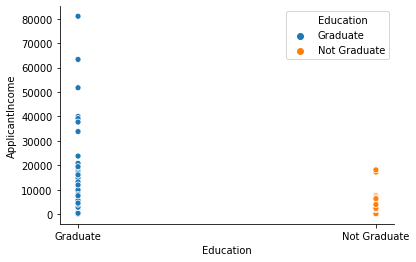

In [18]:
# Scatter Plot for variable ApplicantIncome by variable Education of training data set
ax=sns.scatterplot(x='Education',y='ApplicantIncome',data=df,hue="Education")
# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

#this is for checking outlier
#output-->graduated people have larger applicant income than non-graduated .

In [19]:
#Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print(loan_approval)

#422 NO. OF LOANS ARE APPROVED . 

422


In [20]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True)

# OUTPUT : MOSTLY LOANS ARE APPROVED WHEN THE PERSON HAS A CREDIT HISTORY 1 THAN THOSE WHO HAS CREDIT HISTORY 0 .

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [21]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# Loan approval rate for customers having Credit_History (1)
Pt=pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
loan_approval_with_Credit_1 = Pt['Y'][1]
print(loan_approval_with_Credit_1*100)

79.04761904761905


In [22]:
#79% people approve their loan with credit 1 .
#credit 1-->you have previous borrowing history.

In [23]:
Pt['Y']

Credit_History
0.0    0.078652
1.0    0.790476
All    0.687296
Name: Y, dtype: float64

In [24]:
Pt['N']

Credit_History
0.0    0.921348
1.0    0.209524
All    0.312704
Name: N, dtype: float64

### Detect Outlier by boxplot

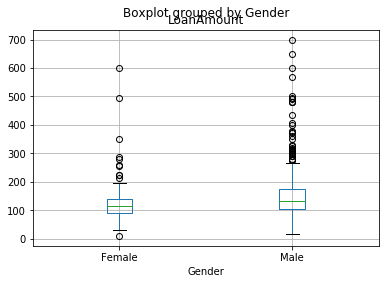

In [25]:
df.boxplot(column='LoanAmount',by = 'Gender')
#loan amount has missing values mostly in male box , while applicant income has less missing value.

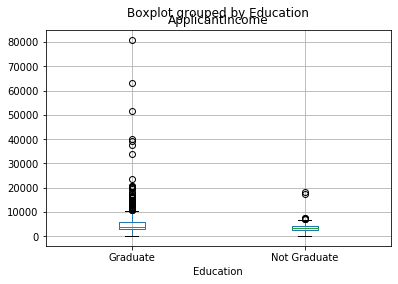

In [26]:
df.boxplot(column='ApplicantIncome',by='Education')

In [27]:
# Convert all CATEGORICAL values to number

f=['Gender','Education','Credit_History','Loan_Status']
for var in f:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
    
#d=pd.DataFrame() 
#d['Loan_ID']= df['Loan_ID']
#df.drop(columns='Loan_ID',inplace=True)

df.dtypes

Loan_ID               object
Gender                 int32
Married               object
Dependents            object
Education              int32
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int32
Property_Area         object
Loan_Status            int32
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [28]:
df.head()

# in Gender , 1 represent male , 0 represent female
# in Education , 1 represent non-Graduated , 0 represent graduated
# in Loan_Status , 1 represent yes , 0 represent no

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,No,0,0,No,5849,0.0,146.412162,360.0,1,Urban,1,5849.0,8.674026
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.000000,360.0,1,Rural,0,6091.0,8.714568
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1,Urban,1,3000.0,8.006368
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.000000,360.0,1,Urban,1,4941.0,8.505323
4,LP001008,1,No,0,0,No,6000,0.0,141.000000,360.0,1,Urban,1,6000.0,8.699515


### remove outliers

In [29]:
col = ['Gender','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status','TotalIncome','TotalIncome_log']

df_new = pd.DataFrame()
df_new = df[(np.abs(stats.zscore(df[col])) < 3).all(axis=1)]
df_new.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,No,0,0,No,5849,0.0,146.412162,360.0,1,Urban,1,5849.0,8.674026
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.000000,360.0,1,Rural,0,6091.0,8.714568
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1,Urban,1,3000.0,8.006368
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.000000,360.0,1,Urban,1,4941.0,8.505323
4,LP001008,1,No,0,0,No,6000,0.0,141.000000,360.0,1,Urban,1,6000.0,8.699515
5,LP001011,1,Yes,2,0,Yes,5417,4196.0,267.000000,360.0,1,Urban,1,9613.0,9.170872
6,LP001013,1,Yes,0,1,No,2333,1516.0,95.000000,360.0,1,Urban,1,3849.0,8.255569
7,LP001014,1,Yes,3+,0,No,3036,2504.0,158.000000,360.0,0,Semiurban,0,5540.0,8.619750
8,LP001018,1,Yes,2,0,No,4006,1526.0,168.000000,360.0,1,Urban,1,5532.0,8.618305
10,LP001024,1,Yes,2,0,No,3200,700.0,70.000000,360.0,1,Urban,1,3900.0,8.268732


In [30]:
print(df_new.shape)
print(df.shape)

(577, 15)
(614, 15)


In [31]:
# FINALLY OUTLIERS ARE REMOVED 

## Normalization

In [32]:
col =  ['Gender','Education','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_Status','TotalIncome','TotalIncome_log']

minmax = MinMaxScaler()
data_norm = minmax.fit_transform(df_new[col])

#normalized_df=(df_new[col]-df_new[col].min())/(df_new[col].max()-df_new[col].min())

In [33]:
print(data_norm.min(axis=0))
print(data_norm.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
df_new.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log
0,LP001002,1,No,0,0,No,5849,0.0,146.412162,360.0,1,Urban,1,5849.0,8.674026
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.000000,360.0,1,Rural,0,6091.0,8.714568
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1,Urban,1,3000.0,8.006368
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.000000,360.0,1,Urban,1,4941.0,8.505323
4,LP001008,1,No,0,0,No,6000,0.0,141.000000,360.0,1,Urban,1,6000.0,8.699515
5,LP001011,1,Yes,2,0,Yes,5417,4196.0,267.000000,360.0,1,Urban,1,9613.0,9.170872
6,LP001013,1,Yes,0,1,No,2333,1516.0,95.000000,360.0,1,Urban,1,3849.0,8.255569
7,LP001014,1,Yes,3+,0,No,3036,2504.0,158.000000,360.0,0,Semiurban,0,5540.0,8.619750
8,LP001018,1,Yes,2,0,No,4006,1526.0,168.000000,360.0,1,Urban,1,5532.0,8.618305
10,LP001024,1,Yes,2,0,No,3200,700.0,70.000000,360.0,1,Urban,1,3900.0,8.268732


# Visualization

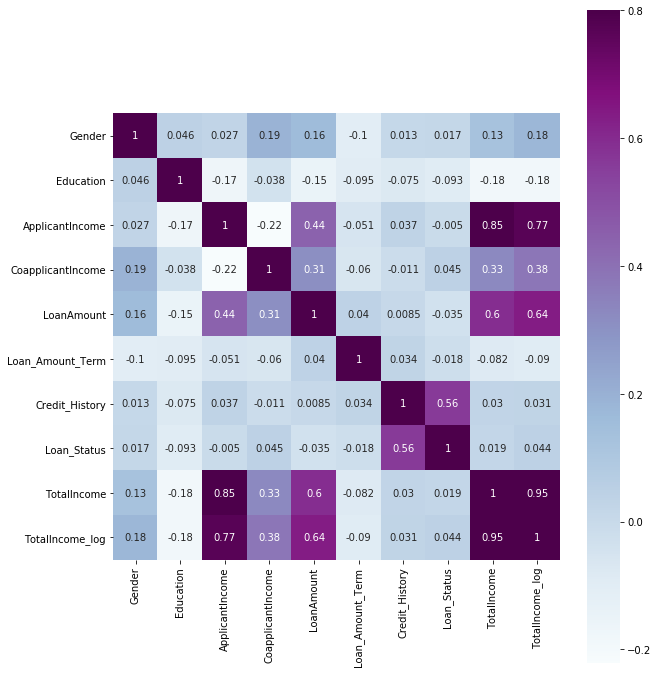

In [35]:
matrix = df_new.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot=True);
plt.show()

In [36]:
# WE SEE THE RELATIONSHIP BETWEEN :

# 1. EDUACTION - GENDER
# 2. APPLICANTINCOME - LOANAMOUNT - GENDER
# 3. COAPPLICANTINCOME - LOANAMOUNT
# 4. LOANAMOUNT - TOTALINCOME
# 5. LOAN_STATUS - CREDI_HISTORY

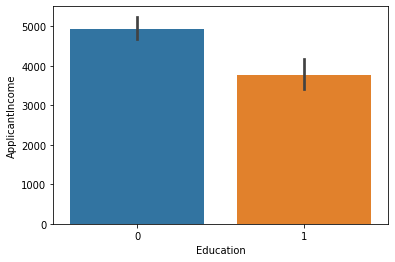

In [37]:
fig , ax = plt.subplots()
ax = sns.barplot(df_new['Education'],df_new['ApplicantIncome'])
plt.show()

# CONCLUSION - GRADUATED PEOPLE HAS HIGHER INCOME THAN NON-GRADUATED . 

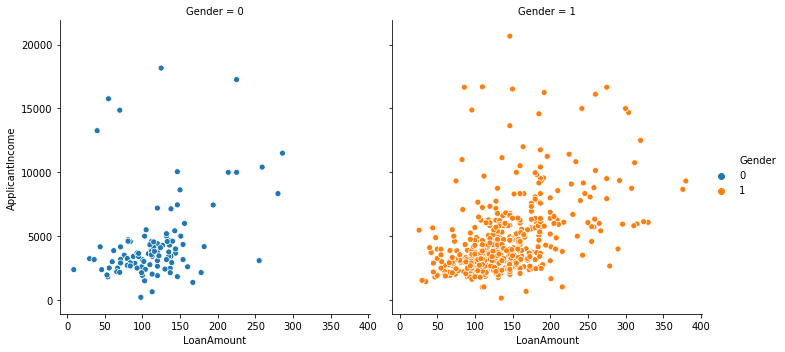

In [38]:
# RELATIONAL PLOT BETWEEN APPLICANT INCOME AND LOAN AMOUUNT BY GENDER
# 0 REPRESENT FEMALE , 1 REPRESENT MALE 

sns.relplot(x='LoanAmount',y='ApplicantIncome',data=df_new,col='Gender',hue='Gender')
plt.show()

# CONCLUSION : MALE HAS HIGHER APPLICANT INCOME AND TAKE MORE LOANS THAN FEMALE 

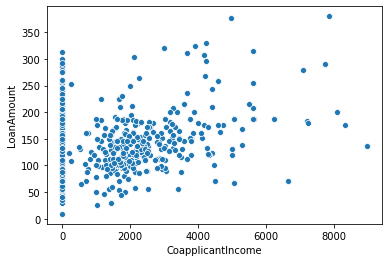

In [39]:
# SCATTER PLOT BETWEEN COAPPLICANT INCOME AND LOAN AMOUNT.

sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',data=df_new)
plt.show()

# CONCLUSION : MANY PEOPLE TAKE LOAN WITH OUT COAPPLICANT AND SOME ARE BY COAPPLICANT , MAJORITY COAPPLICANT INCOME IS LIE 
# IN RANGE 10,000 - 30,000 . 

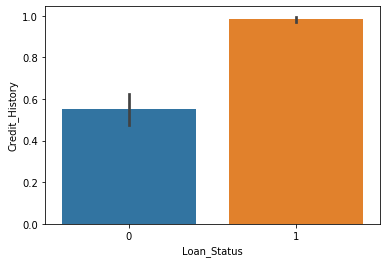

In [40]:
# BAR PLOT BETWEEN LOAN STATUS AND CREDIT HISTORY 

sns.barplot(x='Loan_Status',y='Credit_History',data=df_new )
plt.show()

# CONCLUSION : MOSTLY LOAN APPROVED WHEN CREDIT HISTORY IS 1 . 